In [58]:
from IPython.core.display import Image
import os
from dotenv import load_dotenv
load_dotenv()

True

# Azure LangChain integrations and plugins

### Kia Ora and welcome everyone

Software engineering Capstone project 2024, Massey University, New Zealand. 

**Members:**
- Dale Geronimo
- Jordan Wood
- Kyle Partridge
- Yurika Iwase

**Clients:** 
- Krista Pratico
- Anna Tisch

## What is LangChain?

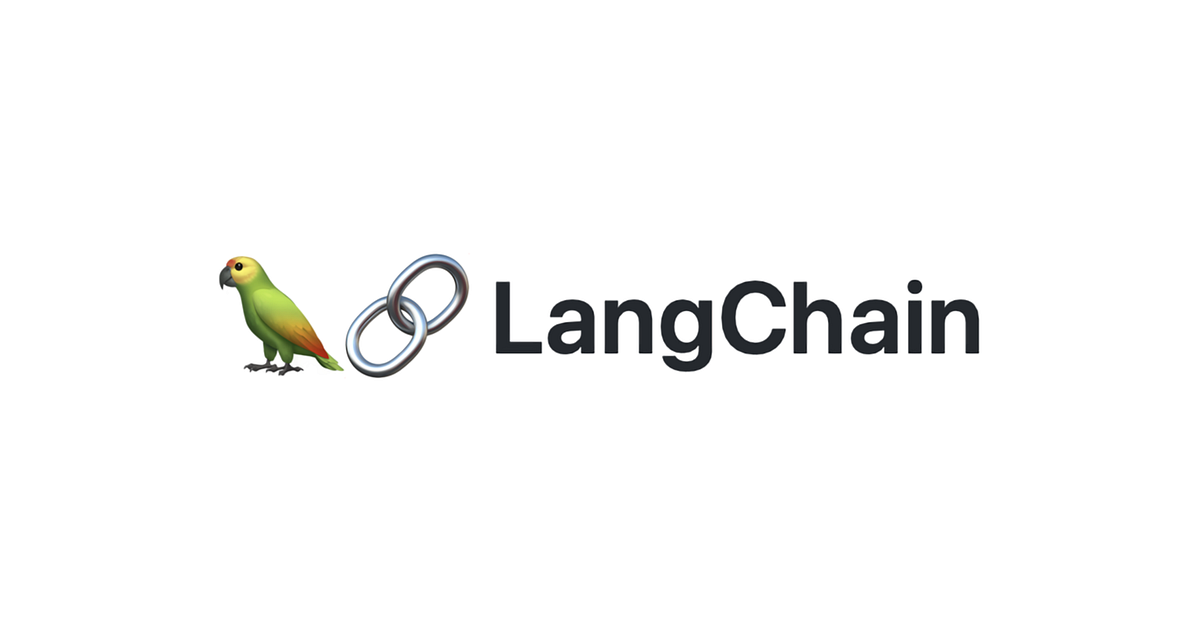

In [59]:
Image('presentation_Images/langchain.png', width=500)

#### Like us at the start, a few of you are probably wondering what LangChain actually is? 

LangChain is a framework designed to integrate various AI services from different companies and organizations, making them easier to combine through LangChain’s service integrations.

Many LangChain classes serve as wrappers around existing SDKs or services. For instance, with Azure AI Services, most LangChain python class implementations utilize the Azure Python SDK behind the scenes. These classes often extend from a base LangChain class, allowing them to be easily 'chained' together with other similar classes.

In [60]:
from langchain_openai import AzureChatOpenAI
from langchain_core.prompts import ChatPromptTemplate

In [61]:
model = AzureChatOpenAI(azure_deployment=os.environ['COMPLETIONS_MODEL'],)

In [62]:
prompt = ChatPromptTemplate.from_messages([("system", "repeat after me: {input}")])

In [63]:
chain = prompt | model

In [64]:
response = chain.invoke('hello world!')
response.content

'Hello world!'

With the rapid growth of AI services driven by the current AI movement, it can be challenging for customers to set up and understand how to use these services. It can also be difficult to combine multiple services to fully leverage the available AI capabilities.

LangChain’s built-in language, the LangChain Expression Language (LCEL), simplifies the process of using different classes together. As you can see, with just a few lines of code, a user can initialize a service, provide input, and receive a response. This ease of use remains consistent regardless of the service or combination of services being used. LangChain is highly streamlined and enables seamless integration of AI services from different providers.

## Our goals

Our primary goal was to identify Azure AI service integrations that were partially or fully lacking implementation in LangChain and to create or improve those integrations.

Starting off, our idea was to familiarize ourselves with both LangChain and Azure Services, as none of us had extensive experience with either. We began by experimenting with several Azure OpenAI resources and services, aiming to both understand them better and identify any that were either partially or fully lacking implementation in LangChain. By using these resources, we gained insights into how they were expected to function, explored the SDKs to assess available methods and features, and evaluated which of these were being exposed in LangChain's Azure integrations.

In fact, we created a `getting_started` cookbook with all of our initial work, which is now available in the Azure-samples/openai repository. This not only helped us become familiar with the services but also served as a record of our progress and any issues we encountered, providing helpful information for new customers learning how to use Azure OpenAI services.

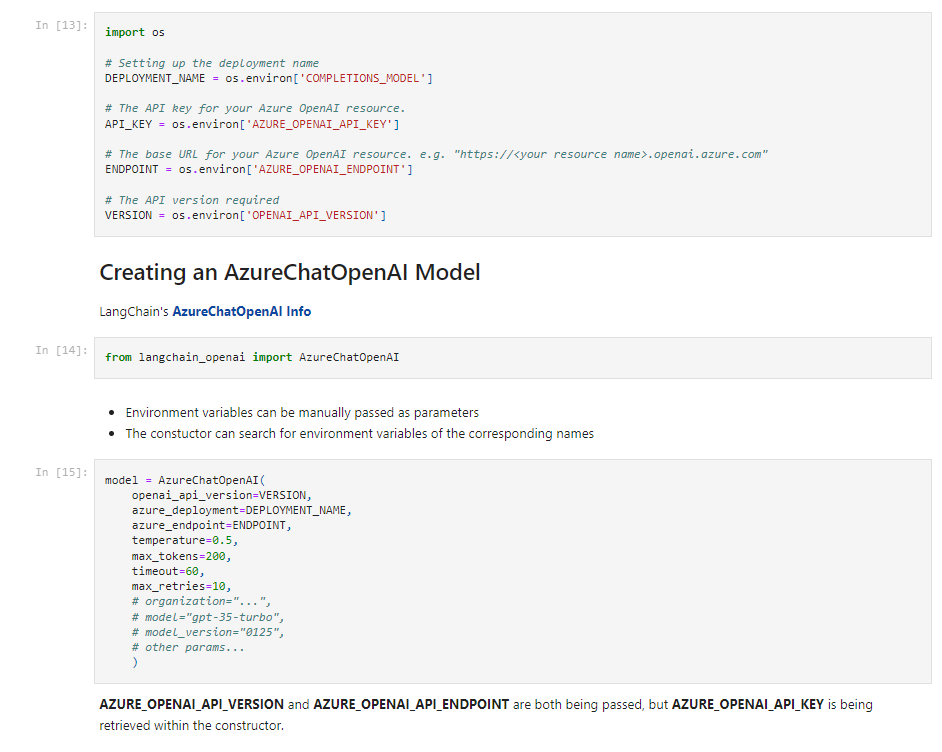

In [8]:
Image('presentation_Images/notebook1.png', width=700)

#### We kept the notebook formal, but we definitely added some character to it and had fun along the way.

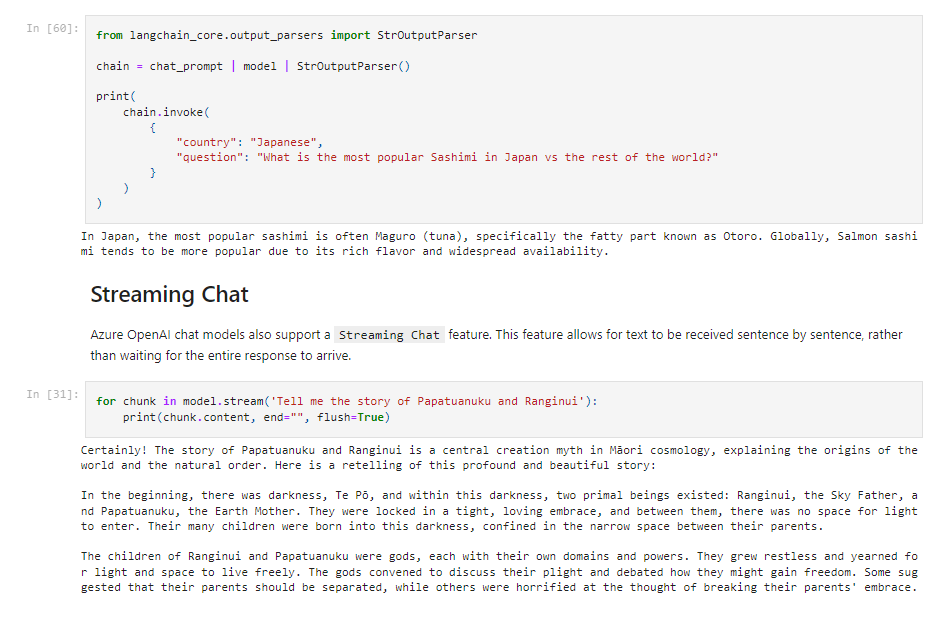

In [9]:
Image('presentation_Images/notebook2.png', width=700)

We then moved on to researching other Azure service implementations, such as Azure AI Content Safety, Azure OpenAI Whisper, Azure AI Translation Services, and others. By exploring the LangChain repository, we were able to identify additional services that were either partially or fully lacking implementation.

## Our Findings

A major challenge at the start was simply finding documentation for some classes within LangChain. Once we identified a service implementation, we recorded it in an Excel sheet to track its location. Additionally, as LangChain is both new and rapidly evolving, many newer versions of the documentation lacked references to classes mentioned in older versions. This meant we often had to refer to outdated documentation to find relevant information. 

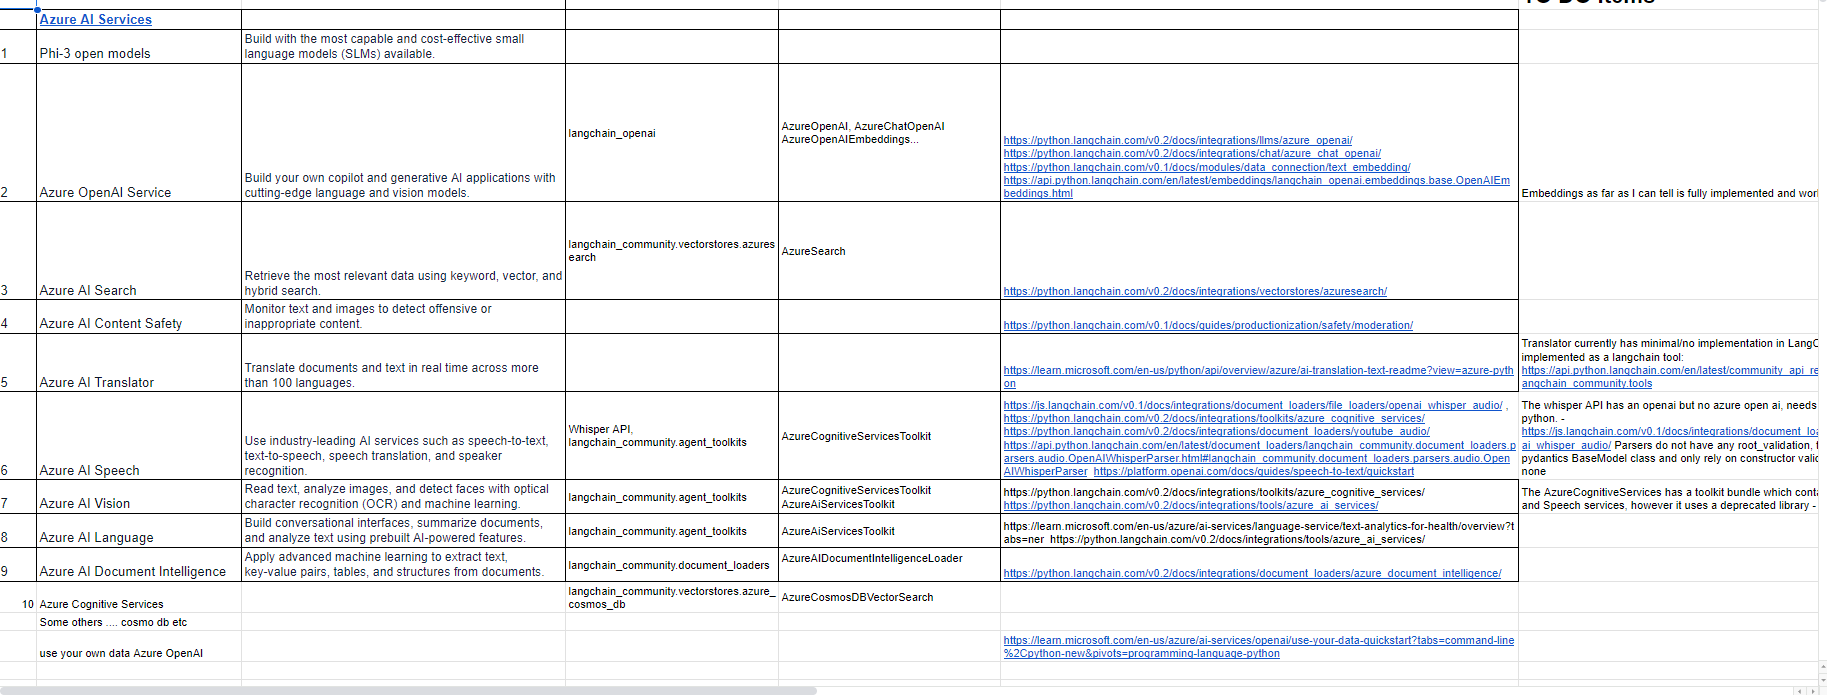

In [65]:
Image('presentation_Images/investigation.png', width=800)

Due to LangChain’s constantly changing state, the framework underwent two major version updates during the course of our project, resulting in significant changes to the code structure and repository organization. We frequently had to adapt how we wrote our classes, align with the code structure expectations of LangChain maintainers, and adjust to evolving standards for environment validation.


| **LangChain V1 ->** | **LangChain V2 ->** | **LangChain V3** |
|---------------------|---------------------|------------------|

Another issue we encountered was that many existing Azure service implementations relied on deprecated packages or services that are no longer preferred. For instance, there are several Cognitive Service integrations, despite Azure AI Services now being the recommended approach for utilizing these features. In one example, the `AzureAIServicesImageAnalysisTool`, the developers had hardcoded which `VisualFeatures` could be selected for an image, making it non-configurable. Additionally, since the tool’s creation, new types had been added to the `VisualFeatures` enum, but these were not being exposed in the class. It’s clear that with the rapid growth of Azure AI Services, not all LangChain implementations have kept pace with the latest versions and features.

In [66]:
from azure.ai.vision.imageanalysis.models import VisualFeatures
feat = ['TAGS', 'CAPTION', 'OBJECTS', 'READ']

In [67]:
print('Original 4 hardcoded features : \n')
for f in feat:
    print(VisualFeatures[f]) 

Original 4 hardcoded features : 

VisualFeatures.TAGS
VisualFeatures.CAPTION
VisualFeatures.OBJECTS
VisualFeatures.READ


In [68]:
print('All VisualFeatures : \n')
for f in VisualFeatures:
    print(f)

All VisualFeatures : 

VisualFeatures.TAGS
VisualFeatures.CAPTION
VisualFeatures.DENSE_CAPTIONS
VisualFeatures.OBJECTS
VisualFeatures.READ
VisualFeatures.SMART_CROPS
VisualFeatures.PEOPLE


LangChain follows a hierarchical structure, with key abstract base classes and dependencies defined in the main `langchain` and `langchain_core` packages, which are then extended in the `langchain_community` package. While this structure is designed to streamline the integration process, it sometimes required us to think 'inside the box' to determine where a particular service fits within the framework, or which multiple class types a service could be part of. For example, the Azure AI Content Safety was able to be integrated into several LangChain class types, adding complexity to the process.

In summary, LangChain provides excellent integration of various AI service providers and offers seamless functionality. It's also enjoyable to experiment with different service integrations to explore potential combinations of chat models and AI tools for practical, real-world applications. However, our key finding is that LangChain struggles to keep pace with the rapid evolution and growth of AI services. For example, there are currently over 250 open PRs in the repository, but to the best of our knowledge, only a handful of maintainers and reviewers are managing these updates.

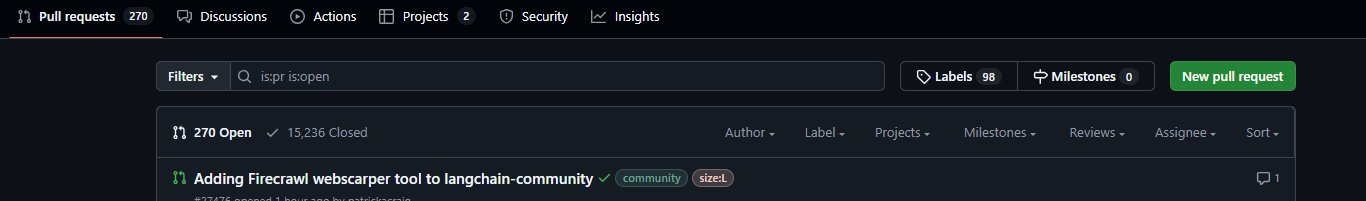

In [69]:
Image('presentation_Images/openpr.png')

## Our Service integrations

We each identified a few Services lacking integration or some functionality that we wanted to work on, they were:

 - The Azure OpenAI Whisper API

 - Azure AI Document Translation

 - Azure AI Text Translation

 - Azure AI Content Safety

 - Azure AI Services Image Analysis 

 - Azure AI Services Face Analysis

## `AzureOpenAIWhisperParser`

In [70]:
from langchain_community.document_loaders.blob_loaders.youtube_audio import YoutubeAudioLoader
from langchain_community.document_loaders.generic import GenericLoader
from libs.community.langchain_community.document_loaders.parsers.audio import AzureOpenAIWhisperParser
from langchain_core.documents.base import Blob

Initialise model

In [71]:
w_model = os.environ['WHISPER_MODEL']

whisper = AzureOpenAIWhisperParser(deployment_name=w_model)

In [72]:
audio_blob = Blob(path="Youtube/Getting Fired On Your First Day.m4a")

Parse

In [73]:
docs = whisper.lazy_parse(audio_blob)

for doc in docs:
    print(doc.page_content)

Hello everyone, this is YOUR daily dose of internet. They didn't realize that one of the mattresses they were trying to deliver was outside of the truck. We lost it. For some reason this dog faints every time it gets scared. I had no idea this sport was so intense. It was his first time learning how to pet a cat. No, stop, stop. Raylan, can you pet the cat? Pet the cat? Good boy! He couldn't understand why he was getting a traffic ticket. One! One! One! One! One! One! One! One! One! One! This poor guy was just trying to fly a kite. She wanted to see if she could save her car from this flooded parking lot. What are you doing? You're literally driving right into it. What are you doing? No! No! No! No! No! Stop! Stop! No! No! No! Okay, that got bad very quickly. She is okay. That is the important part. Her car, uh, maybe not so much. This goat got scared and fainted. Come on! Oh my gosh! Oh my gosh! This family in Florida came home after a hurricane to find this in their house. Oh my good

With `YoutubeAudioLoader`

In [74]:
url=["https://www.youtube.com/watch?v=9m8vdbbnx-I"]

save_dir="Youtube/"

loader=GenericLoader(YoutubeAudioLoader(url, save_dir),
    AzureOpenAIWhisperParser(deployment_name=w_model)
)

docs=loader.load()

[youtube] Extracting URL: https://www.youtube.com/watch?v=9m8vdbbnx-I
[youtube] 9m8vdbbnx-I: Downloading webpage
[youtube] 9m8vdbbnx-I: Downloading ios player API JSON
[youtube] 9m8vdbbnx-I: Downloading mweb player API JSON
[youtube] 9m8vdbbnx-I: Downloading m3u8 information
[info] 9m8vdbbnx-I: Downloading 1 format(s): 140
[download] Youtube//Getting Fired On Your First Day.m4a has already been downloaded
[download] 100% of    8.10MiB
[ExtractAudio] Not converting audio Youtube//Getting Fired On Your First Day.m4a; file is already in target format m4a


In [75]:
text = None
for doc in docs:
    print(doc.page_content)
    transcribed_text = doc.page_content

Hello everyone, this is YOUR daily dose of internet. They didn't realize that one of the mattresses they were trying to deliver was outside of the truck. We lost it. For some reason this dog faints every time it gets scared. I had no idea this sport was so intense. It was his first time learning how to pet a cat. No, stop, stop. Raylan, can you pet the cat? Pet the cat? Good boy! He couldn't understand why he was getting a traffic ticket. One! One! One! One! One! One! One! One! One! One! This poor guy was just trying to fly a kite. She wanted to see if she could save her car from this flooded parking lot. What are you doing? You're literally driving right into it. What are you doing? No! No! No! No! No! Stop! Stop! No! No! No! Okay, that got bad very quickly. She is okay. That is the important part. Her car, uh, maybe not so much. This goat got scared and fainted. Come on! Oh my gosh! Oh my gosh! This family in Florida came home after a hurricane to find this in their house. Oh my good

With `AzureChatOpenAI`

In [76]:
deployment = os.environ['COMPLETIONS_MODEL']

model = AzureChatOpenAI(azure_deployment=deployment)

prompt = ChatPromptTemplate.from_messages([("system", "Return any info related to a truck from the input: {input}")])

chain = prompt | model

In [77]:
response = chain.invoke(transcribed_text)

In [78]:
response.content

"They didn't realize that one of the mattresses they were trying to deliver was outside of the truck."

## `AzureFileTranslateTool`

In [79]:
from libs.community.langchain_community.tools.azure_ai_services.azure_file_translation import AzureFileTranslateTool
from langchain.agents import AgentExecutor, create_structured_chat_agent
from langchain import hub

`LangSmith` is a toolkit within LangChain designed to help users debug, monitor, and optimize their AI chains, while `LangSmith Prompts` allow for dynamic, structured input generation to test models and share structured input formats for all customers to use.

In [80]:
LANGSMITH_KEY = os.environ['LANGSMITH_KEY']

prompt = hub.pull("hwchase17/structured-chat-agent", api_key=LANGSMITH_KEY)

In [81]:
tools = [AzureFileTranslateTool()]

model = AzureChatOpenAI(azure_deployment=deployment)

agent = create_structured_chat_agent(model, tools, prompt)

In [82]:
agent_executor = AgentExecutor(
    agent=agent, tools=tools, verbose=True, handle_parsing_errors=True
)

In [84]:
input = "presentation_Images/example.docx"
agent_executor.invoke({"input": f"Can you translate the following file into icelandic and return the content: {input}"})



> Entering new AgentExecutor chain...
{
  "action": "azure_file_translation",
  "action_input": {
    "query": "presentation_Images/example.docx",
    "to_language": "is"
  }
}Sólin var að setjast á bak við hæðirnar og málaði himininn í appelsínugulum, bleikum og fjólubláum litbrigðum. Fuglar voru á leið aftur í hreiður sín og blíður andvari bar með sér ilm af blómstrandi blómum. Þorpið var hljóðlátt, aðeins stöku hljóð af börnum sem hlæja í fjarska. Fólk var byrjað að kveikja á lömpum sem vörpuðu hlýjum bjarma inn um glugga heimila sinna. Dagurinn var að líða undir lok en hann skildi eftir sig friðartilfinningu, áminningu um hina einföldu fegurð sem er að finna á hversdagslegum augnablikum.{
  "action": "Final Answer",
  "action_input": "Here is the translated content: \n\nSólin var að setjast á bak við hæðirnar og málaði himininn í appelsínugulum, bleikum og fjólubláum litbrigðum. Fuglar voru á leið aftur í hreiður sín og blíður andvari bar með sér ilm af blómstrandi blómum. Þorpið

{'input': 'Can you translate the following file into icelandic and return the content: presentation_Images/example.docx',
 'output': 'Here is the translated content: \n\nSólin var að setjast á bak við hæðirnar og málaði himininn í appelsínugulum, bleikum og fjólubláum litbrigðum. Fuglar voru á leið aftur í hreiður sín og blíður andvari bar með sér ilm af blómstrandi blómum. Þorpið var hljóðlátt, aðeins stöku hljóð af börnum sem hlæja í fjarska. Fólk var byrjað að kveikja á lömpum sem vörpuðu hlýjum bjarma inn um glugga heimila sinna. Dagurinn var að líða undir lok en hann skildi eftir sig friðartilfinningu, áminningu um hina einföldu fegurð sem er að finna á hversdagslegum augnablikum.'}

## `AzureContentSafetyTextTool`

In [85]:
from libs.community.langchain_community.tools.azure_ai_services.content_safety import AzureContentSafetyTextTool

In [86]:
prompt = hub.pull("hwchase17/structured-chat-agent", api_key=LANGSMITH_KEY)

In [87]:
tools = [AzureContentSafetyTextTool()]

model = AzureChatOpenAI(azure_deployment=deployment)

agent = create_structured_chat_agent(model, tools, prompt)

In [88]:
agent_executor = AgentExecutor(
    agent=agent, tools=tools, verbose=True, handle_parsing_errors=True
)

In [89]:
input = "I hate you"
agent_executor.invoke({"input": f"Can you check the following text for harmful content : {input}"})



> Entering new AgentExecutor chain...
{
  "action": "azure_content_safety_tool",
  "action_input": {
    "query": "I hate you"
  }
}Hate: 2
SelfHarm: 0
Sexual: 0
Violence: 0
{
  "action": "Final Answer",
  "action_input": "The text 'I hate you' contains a moderate level of hate sentiment (rated 2). It does not contain any self-harm, sexual, or violent content."
}

> Finished chain.


{'input': 'Can you check the following text for harmful content : I hate you',
 'output': "The text 'I hate you' contains a moderate level of hate sentiment (rated 2). It does not contain any self-harm, sexual, or violent content."}

## `AzureContentSafetyChain`

In [90]:
from libs.community.langchain_community.chains.azure_content_safety_chain import (
    AzureAIContentSafetyChain,
    AzureHarmfulContentError
)

In [91]:
moderate = AzureAIContentSafetyChain()

In [92]:
prompt = ChatPromptTemplate.from_messages([("system", "repeat after me: {input}")])

model = AzureChatOpenAI(azure_deployment=deployment)

In [38]:
moderated_chain = moderate | prompt | model

In [93]:
response = moderated_chain.invoke({"input": "Hey, how are you?"})
response.content

'Hey, how are you?'

With harmful content

In [94]:
try:
    response = moderated_chain.invoke({"input": "I hate you!"})
except AzureHarmfulContentError as a:
    print(a.input)
    raise a

I hate you!


AzureHarmfulContentError: The input has breached Azure's Content Safety Policy

## `AzureAITextTranslateTool`

In [95]:
from libs.community.langchain_community.tools.azure_ai_services.text_translate import AzureAITextTranslateTool

In [96]:
prompt = hub.pull("hwchase17/structured-chat-agent", api_key=LANGSMITH_KEY)

In [97]:
tools = [AzureAITextTranslateTool()]

model = AzureChatOpenAI(azure_deployment=deployment)

agent = create_structured_chat_agent(model, tools, prompt)

In [98]:
agent_executor = AgentExecutor(
    agent=agent, tools=tools, verbose=True, handle_parsing_errors=True
)

In [99]:
input = "It's a great day for fishing ain't it?"
agent_executor.invoke({"input": f"Can you translate the following text into te reo māori: {input}"})



> Entering new AgentExecutor chain...
{
  "action": "azure_translator_tool",
  "action_input": {
    "query": "It's a great day for fishing ain't it?",
    "to_language": "mi"
  }
}He rā tino pai tēnei mo te hī ika ehara i te mea?Action:
```json
{
  "action": "Final Answer",
  "action_input": "He rā tino pai tēnei mo te hī ika ehara i te mea?"
}
```

> Finished chain.


{'input': "Can you translate the following text into te reo māori: It's a great day for fishing ain't it?",
 'output': 'He rā tino pai tēnei mo te hī ika ehara i te mea?'}

## `AzureAIFaceAnalysisTool` 

In [100]:
from libs.community.langchain_community.tools.azure_ai_services.face_analysis import AzureAIFaceAnalysisTool

In [101]:
prompt = hub.pull("hwchase17/structured-chat-agent", api_key=LANGSMITH_KEY)

In [102]:
tools = [AzureAIFaceAnalysisTool()]

model = AzureChatOpenAI(azure_deployment=deployment)

agent = create_structured_chat_agent(model, tools, prompt)

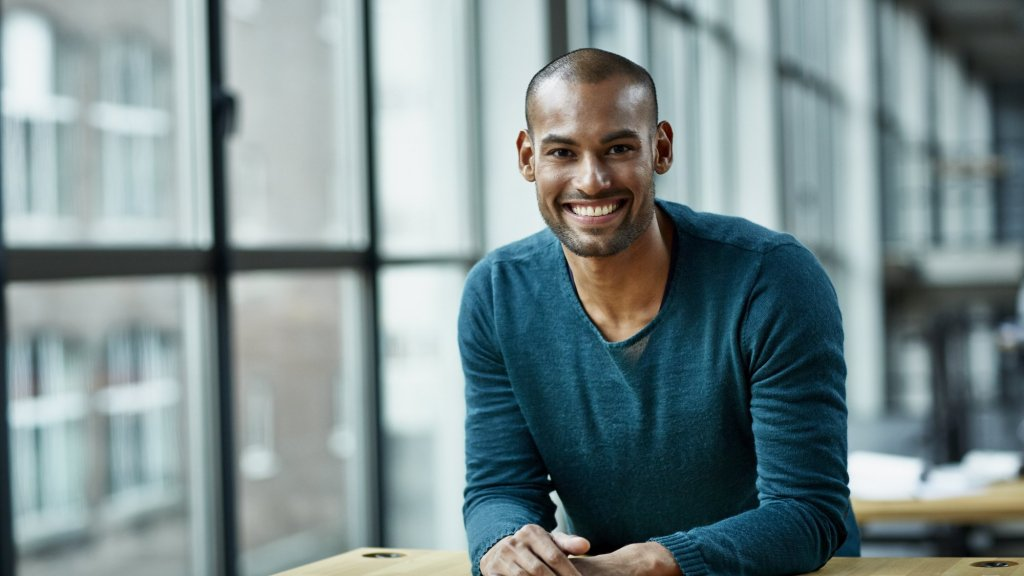

In [103]:
Image('presentation_Images/guy.jpg', width=500)

In [104]:
agent_executor = AgentExecutor(
    agent=agent, tools=tools, verbose=True, handle_parsing_errors=True
)

In [105]:
input = 'presentation_Images/guy.jpg'
agent_executor.invoke({"input": f"Can you check the following image for faces, and if there is a face return the location: {input}"})



> Entering new AgentExecutor chain...
Sure! I'll analyze the image for faces.

Action:
```
{
  "action": "azure_ai_face_analysis",
  "action_input": {
    "query": "presentation_Images/guy.jpg"
  }
}
```FACE: 1
faceId: 6e40b5c6-24a5-4fbc-9fe5-fb6f7ada5846
faceRectangle: {'top': 81, 'left': 529, 'width': 121, 'height': 173}
faceLandmarks: {'pupilLeft': {'x': 561.8, 'y': 153.0}, 'pupilRight': {'x': 619.2, 'y': 149.6}, 'noseTip': {'x': 590.9, 'y': 187.2}, 'mouthLeft': {'x': 561.9, 'y': 204.5}, 'mouthRight': {'x': 627.2, 'y': 199.5}, 'eyebrowLeftOuter': {'x': 541.5, 'y': 143.8}, 'eyebrowLeftInner': {'x': 574.1, 'y': 141.2}, 'eyeLeftOuter': {'x': 552.1, 'y': 153.5}, 'eyeLeftTop': {'x': 562.3, 'y': 150.0}, 'eyeLeftBottom': {'x': 561.1, 'y': 155.3}, 'eyeLeftInner': {'x': 571.6, 'y': 153.1}, 'eyebrowRightInner': {'x': 603.8, 'y': 139.6}, 'eyebrowRightOuter': {'x': 639.8, 'y': 139.3}, 'eyeRightInner': {'x': 609.6, 'y': 151.2}, 'eyeRightTop': {'x': 618.3, 'y': 146.3}, 'eyeRightBottom': {'x': 6

{'input': 'Can you check the following image for faces, and if there is a face return the location: presentation_Images/guy.jpg',
 'output': 'The image contains one face. The face is located at the following coordinates: top: 81, left: 529, width: 121, height: 173.'}

## Use 'em All

In [106]:
from docx import Document

In [107]:
url=["https://www.youtube.com/watch?v=9m8vdbbnx-I&t=1s"]

save_dir="Youtube/"

loader=GenericLoader(YoutubeAudioLoader(url, save_dir),
    AzureOpenAIWhisperParser(deployment_name=w_model)
)

docs=loader.load()

[youtube] Extracting URL: https://www.youtube.com/watch?v=9m8vdbbnx-I&t=1s
[youtube] 9m8vdbbnx-I: Downloading webpage
[youtube] 9m8vdbbnx-I: Downloading ios player API JSON
[youtube] 9m8vdbbnx-I: Downloading mweb player API JSON
[youtube] 9m8vdbbnx-I: Downloading m3u8 information
[info] 9m8vdbbnx-I: Downloading 1 format(s): 140
[download] Youtube//Getting Fired On Your First Day.m4a has already been downloaded
[download] 100% of    8.10MiB
[ExtractAudio] Not converting audio Youtube//Getting Fired On Your First Day.m4a; file is already in target format m4a


In [108]:
document = Document()

for doc in docs:
    document.add_paragraph(doc.page_content)
    
document.save('presentation_Images/test_doc.docx')

In [109]:
prompt = hub.pull("hwchase17/structured-chat-agent", api_key=LANGSMITH_KEY)

tools = [AzureContentSafetyTextTool(), AzureFileTranslateTool(), AzureAITextTranslateTool()]

model = AzureChatOpenAI(azure_deployment=deployment)

agent = create_structured_chat_agent(model, tools, prompt)

In [110]:
agent_executor = AgentExecutor(
    agent=agent, tools=tools, verbose=True, handle_parsing_errors=True
)

In [113]:
input = 'presentation_Images/test_doc.docx'

agent_executor.invoke({"input" : "can you translate the input document file to German " 
                        " and then translate the text content back into english "
                        f"and then check the text for harmful content: {input}"})



> Entering new AgentExecutor chain...
{
  "action": "azure_file_translation",
  "action_input": {
    "query": "presentation_Images/test_doc.docx",
    "to_language": "de"
  }
}Hallo zusammen, das ist IHRE tägliche Dosis Internet. Sie wussten nicht, dass sich eine der Matratzen, die sie liefern wollten, außerhalb des Lastwagens befand. Wir haben es verloren. Aus irgendeinem Grund fällt dieser Hund jedes Mal in Ohnmacht, wenn er Angst bekommt. Ich hatte keine Ahnung, dass dieser Sport so intensiv ist. Es war das erste Mal, dass er lernte, wie man eine Katze streichelt. Nein, stopp, stopp. Raylan, kannst du die Katze streicheln? Die Katze streicheln? Guter Junge! Er konnte nicht verstehen, warum er einen Strafzettel bekam. Eins! Eins! Eins! Eins! Eins! Eins! Eins! Eins! Eins! Eins! Dieser arme Kerl hat gerade versucht, einen Drachen steigen zu lassen. Sie wollte sehen, ob sie ihr Auto vor diesem überfluteten Parkplatz retten kann. Was machst du? Man fährt buchstäblich direkt hinein. Wa

{'input': 'can you translate the input document file to German  and then translate the text content back into english and then check the text for harmful content: presentation_Images/test_doc.docx',
 'output': 'The text from the document has been translated to German and then back to English. The content is not harmful and has been rated with a score of 0 for hate, self-harm, sexual, and violence.'}

## Conclusion

Both this project and getting more familiar with LangChain and Azure has been a lot of fun. We've all learnt a tonne and hope that our contributions will help expose more Azure Service features to Azure customers around the world.

Thanks a lot for listening, Haere Ra!